In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve

C:\Users\Noblesse\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_eng = pd.read_csv('takehome_user_engagement.csv')

In [5]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


#### Let's take care of the null values in df first.

In [7]:
# Let's first convert the unix timestamp to datettime.
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit='s')

In [8]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


##### As shown in the very first row, it seems like if the user hasn't had any activites, 'last_creation_time' is as same as the 'creation_time'.

In [9]:
# Let's look for the null values in last_session_creation_time
df.loc[df['last_session_creation_time'].isna()].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN


In [10]:
# Let's take the object_id (user's id) and match it against df_eng (row for each day that a user logged into the product).
user_null = df.loc[df.last_session_creation_time.isna()]['object_id'].values.tolist()
df_eng.loc[df_eng['user_id'].isin(user_null)]

,time_stamp,user_id,visited


#### This shows that the null values from last_session_creation_time didn't actually get 'misplaced'. What we can do then is to replace these times with the unix timestamp of the creation_time.

In [11]:
# Change the datatype of creation_time from object to datetime format.
df['creation_time'] = df['creation_time'].astype('datetime64')

In [12]:
# Replace the NaT in last_session_creation_time with creation_time.
df['last_session_creation_time'].fillna(df['creation_time'], inplace=True)

In [13]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [14]:
# Let's see if we can replace the null values in 'invited_by_user_id' with 0. 
# Make sure no user has an id of 0 in both dataframes
any(df.object_id == 0)

False

In [15]:
any(df_eng.user_id == 0)

False

In [16]:
# Replace the 'invited_by_user_id' with 0
df['invited_by_user_id'].fillna(0, inplace=True)

# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period.

In [17]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [18]:
# Check for any null values in engagement dataframe
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [19]:
# Change time_stamp into datetime datatype
df_eng['time_stamp'] = df_eng['time_stamp'].astype('datetime64')

In [20]:
# Add year and week to the column
df_eng.insert(column='year', value=df_eng['time_stamp'].dt.year, loc=1)
df_eng.insert(column='week', value=df_eng['time_stamp'].dt.week, loc=2)

In [21]:
df_eng.head()

,time_stamp,year,week,user_id,visited
0,2014-04-22 03:53:30,2014,17,1,1
1,2013-11-15 03:45:04,2013,46,2,1
2,2013-11-29 03:45:04,2013,48,2,1
3,2013-12-09 03:45:04,2013,50,2,1
4,2013-12-25 03:45:04,2013,52,2,1


### We will group the dataframe by the year, week, and user_id and aggrgate using count. This way we can filter out if the user visited more than 3 times in a given week (adopted user).

In [22]:
# Make a copy of dataframe and drop 'time_stamp'
df_eng_group = df_eng.copy()
df_eng_group.drop('time_stamp', axis=1, inplace=True)

In [23]:
# Groupby 'year', 'week', 'user_id' and aggregate using count
df_eng_group = df_eng_group.groupby(['year', 'week', 'user_id']).agg('count')

In [24]:
# Filter dataframe by visited count of more than or equal to 3
df_eng_group = df_eng_group.loc[df_eng_group['visited'] >= 3]
df_eng_group.head()

visited
year week user_id         
2012 23   1693           3
     24   728            4
          11764          3
     25   1693           3
          5297           3

In [25]:
# Reset the index 
df_eng_group = df_eng_group.loc[df_eng_group['visited'] >= 3].reset_index()
df_eng_group.head()

,year,week,user_id,visited
0,2012,23,1693,3
1,2012,24,728,4
2,2012,24,11764,3
3,2012,25,1693,3
4,2012,25,5297,3


In [26]:
# How many adopted users are there?
len(df_eng_group.user_id.unique())

1444

#### There are 1444 adopted users

In [27]:
# Store the unique user_ids into a list
adopt_users = df_eng_group.user_id.unique().tolist()

In [28]:
# Add adopt_user to main dataframe
# 0 if not an adopted user, 1 if adopted user
df['adopt_user'] = np.where(df['object_id'].isin(adopt_users), 1, 0)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [29]:
# Make a copy of the main dataframe
df_ml = df.copy()

In [30]:
# Drop object_id, name, email, creation_time, and 'last_session_creation_time'.
# chances are it is very less likely that their user_id, name, and email does not determine user adoption.
df_ml.drop(['object_id', 'name', 'email', 'creation_time', 'last_session_creation_time'], axis=1, inplace=True)

In [31]:
# One hot encode creation_source
dummy = pd.get_dummies(df_ml['creation_source'])
dummy.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [32]:
# Drop creation_source and add one hot encoded version of creation_source
df_ml.drop('creation_source', axis=1, inplace=True)
df_ml = pd.concat([dummy, df_ml], axis=1)

In [33]:
df_ml.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt_user
0,1,0,0,0,0,1,0,11,10803.0,0
1,0,1,0,0,0,0,0,1,316.0,1
2,0,1,0,0,0,0,0,94,1525.0,0
3,1,0,0,0,0,0,0,1,5151.0,0
4,1,0,0,0,0,0,0,193,5240.0,0


In [34]:
# Change invited_by_user_id to integer
df_ml['invited_by_user_id'] = df_ml['invited_by_user_id'].astype('int')

In [35]:
print('There are {} non-adopted users in the dataset.'.format(len(df_ml.loc[df_ml['adopt_user'] == 0])))
print('There are {} adopted users in the dataset.'.format(len(df_ml.loc[df_ml['adopt_user'] == 1])))

There are 10556 non-adopted users in the dataset.
There are 1444 adopted users in the dataset.


### The dataset is imbalanced and we must acccount for that. This is a supervised binary classification.

In [36]:
# Define X and y and split into train and test
X = df_ml.drop('adopt_user', axis=1)
y = df_ml['adopt_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

In [37]:
# Define weight for the adopt_user
weight = {0: (10556/1444), 1: 1}

In [38]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=3, class_weight=weight)

In [39]:
# Fit data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 7.310249307479224, 1: 1},
                       random_state=3)

In [40]:
# Predict data
y_pred = rf.predict(X_test)

In [41]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3167
           1       0.18      0.07      0.10       433

    accuracy                           0.85      3600
   macro avg       0.53      0.51      0.51      3600
weighted avg       0.80      0.85      0.82      3600



In [42]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[3033  134]
 [ 403   30]]


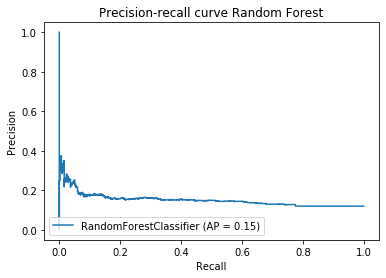

In [43]:
plot_precision_recall_curve(rf, X_test, y_test)
plt.title('Precision-recall curve Random Forest')
plt.show()

In [44]:
# Define column names
column_names = X.columns.tolist()

In [45]:
# Define a variable to store feature importances
importance = rf.feature_importances_

In [46]:
# Print features and their scores based on random forest classifier
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_names[i],v))

Feature: GUEST_INVITE, Score: 0.00256
Feature: ORG_INVITE, Score: 0.00253
Feature: PERSONAL_PROJECTS, Score: 0.00153
Feature: SIGNUP, Score: 0.00136
Feature: SIGNUP_GOOGLE_AUTH, Score: 0.00138
Feature: opted_in_to_mailing_list, Score: 0.00910
Feature: enabled_for_marketing_drip, Score: 0.01052
Feature: org_id, Score: 0.58631
Feature: invited_by_user_id, Score: 0.38469


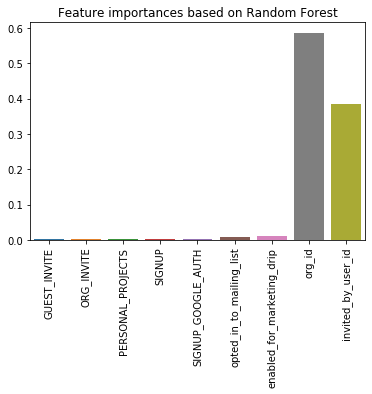

In [47]:
# Plto the feature importances
sns.barplot(x=column_names, y=importance)
plt.xticks(rotation='vertical')
plt.title('Feature importances based on Random Forest')
plt.show()

### Based on above scores, the most important feature is 'org_id', followed by 'invited_by_user_id'.